In [67]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv("df_OP.csv", index_col="Unnamed: 0")

In [10]:
cod_col = ['cod.i' + str(x) for x in range(1, 16)]
codici = []
for col in cod_col:
    codici.extend(df[col])

In [41]:
from collections import Counter
par_list = Counter(codici)
df_pareto = pd.DataFrame.from_dict(par_list, orient='index').reset_index()

In [42]:
df_pareto.dropna(inplace=True)

In [47]:
df_pareto.rename(columns = {'index':'codice', 0:'movimentazioni'}, inplace = True)

In [49]:
df_pareto.sort_values(by='movimentazioni', ascending=False, inplace=True)

In [59]:
df_pareto['pareto'] = 100 *df_pareto.movimentazioni.cumsum() / df_pareto.movimentazioni.sum()

In [76]:
def plotting(df, pareto_column, y_titolo, plot_titolo):
    #Lista dei codici in percentuale ==  asse x del grafico
    codici = []

    for x in range( len( df ) ):
        codici.append( ( x / len(df) ) * 100 )
    
    df.sort_values(pareto_column, inplace = True)
    df.reset_index(inplace=True)
    df.drop('index', axis=1, inplace=True)

    plt.figure( figsize = ( 12, 6 ), dpi = 200 )
    plt.plot( codici, df[pareto_column], color='black')

    plt.xticks(np.arange(0, 100, 5))
    plt.yticks(np.arange(0, 100, 5))
    plt.axvspan(0, 20, alpha=0.3, color='red')
    plt.axvspan(20, 40, alpha=0.3, color='orange')
    plt.axvspan(40, 60, alpha=0.3, color='yellow')
    plt.axvspan(60, 80, alpha=0.3, color='green')
    plt.axvspan(80, 100, alpha=0.3, color='blue')

    plt.xlabel('Percentuale sul totale dei codici')
    plt.ylabel(y_titolo)
    plt.title(plot_titolo)
    return()

()

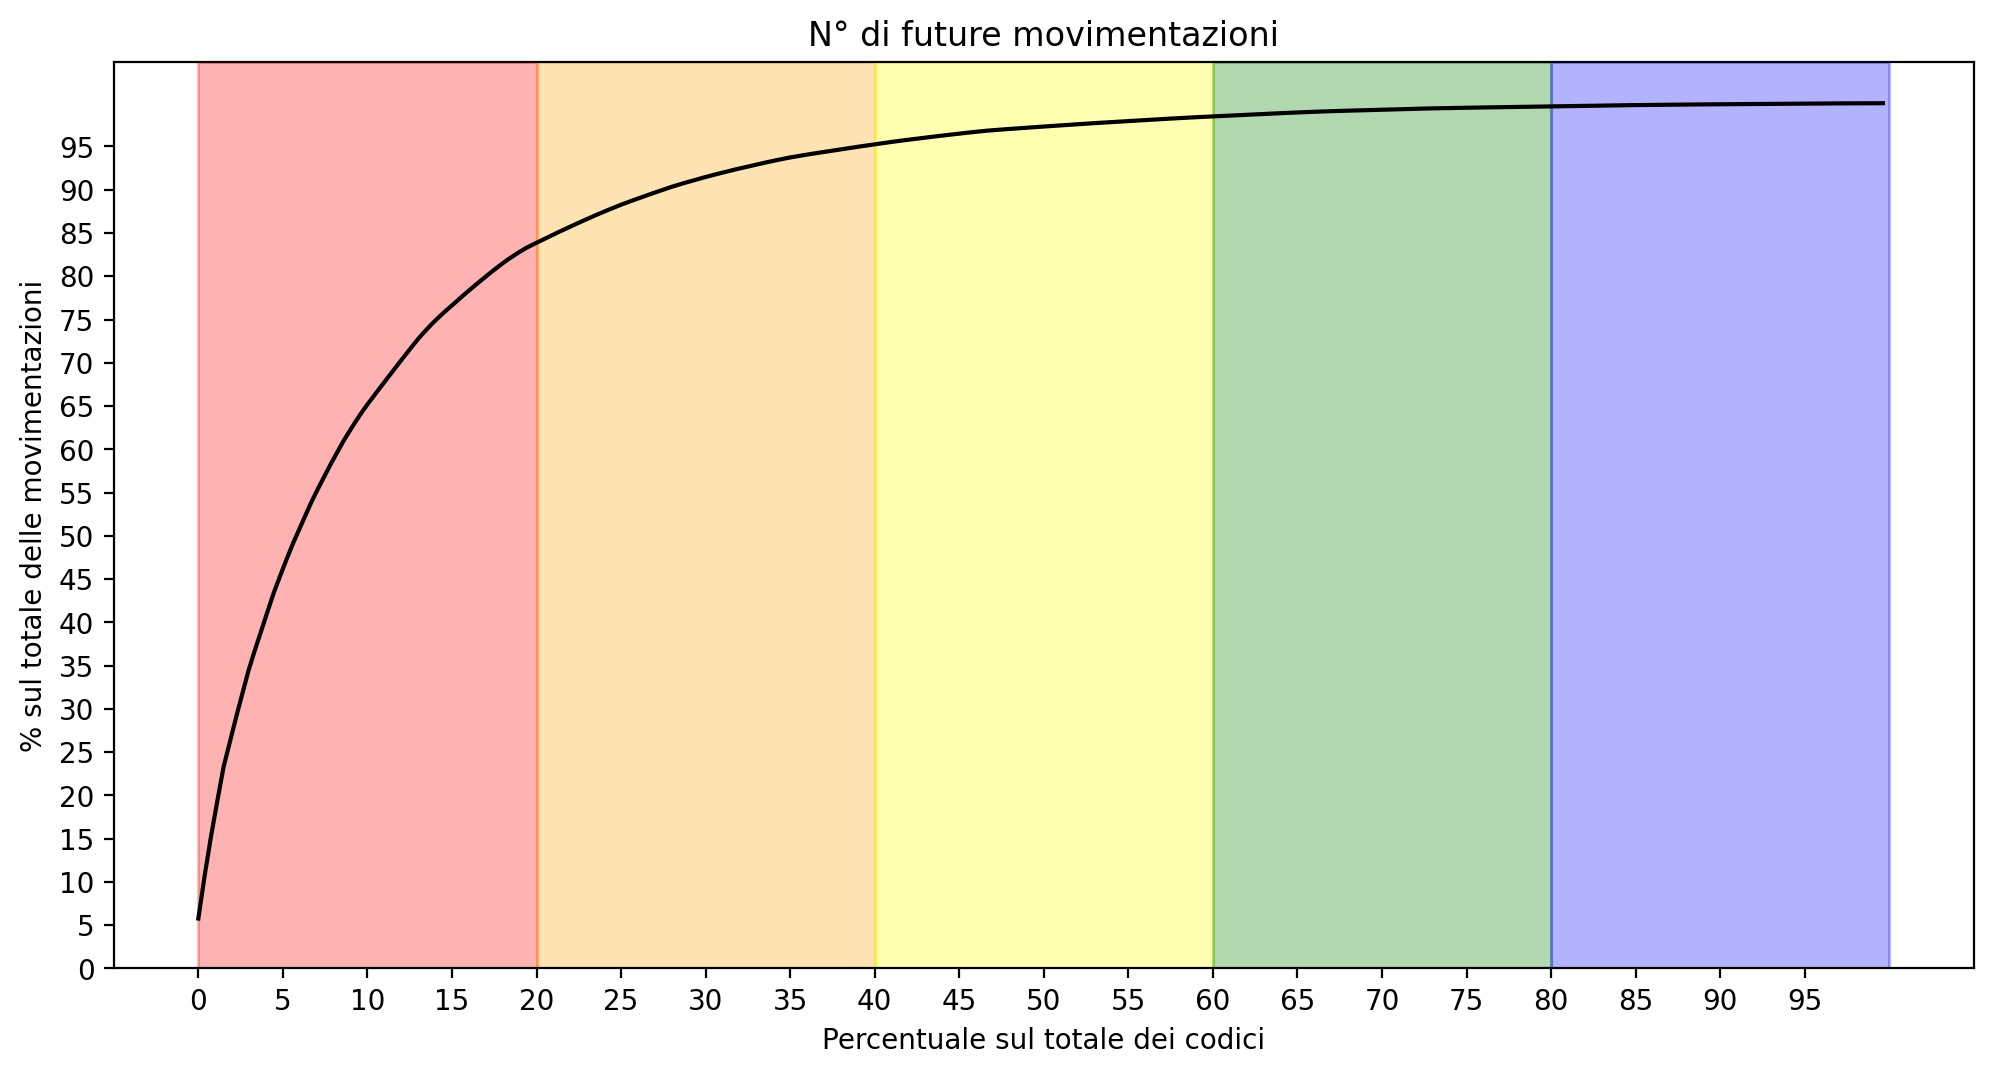

In [79]:
plotting(df_pareto, 'pareto', '% sul totale delle movimentazioni', 'N° di future movimentazioni')

In [83]:
df_pareto

,codice,movimentazioni,pareto,posizione
0,ADD11,1944,5.770943,1
1,BIANCO22,1670,10.728493,1
2,LDPE3,1518,15.234816,1
3,ADD1,1380,19.331473,1
4,FILLER3,1334,23.291575,2
...,...,...,...,...
263,ARANCIO34,1,99.988126,5
264,5D3-4803,1,99.991094,5
265,ROSSO74,1,99.994063,5
266,GIALLO110B,1,99.997031,5


In [90]:
df_pareto['posizione'] = 0
for x in df_pareto.index:
    if ( x / len(df_pareto) ) * 100 <= 20:
        df_pareto.loc[x, 'posizione'] = 1
    elif ( x / len(df_pareto) ) * 100 <= 40:
        df_pareto.loc[x, 'posizione'] = 2
    elif ( x / len(df_pareto) ) * 100 <= 60:
        df_pareto.loc[x, 'posizione'] = 3
    elif ( x / len(df_pareto) ) * 100 <= 80:
        df_pareto.loc[x, 'posizione'] = 4
    else:
        df_pareto.loc[x, 'posizione'] = 5

In [91]:
df_pareto

,codice,movimentazioni,pareto,posizione
0,ADD11,1944,5.770943,1
1,BIANCO22,1670,10.728493,1
2,LDPE3,1518,15.234816,1
3,ADD1,1380,19.331473,1
4,FILLER3,1334,23.291575,1
...,...,...,...,...
263,ARANCIO34,1,99.988126,5
264,5D3-4803,1,99.991094,5
265,ROSSO74,1,99.994063,5
266,GIALLO110B,1,99.997031,5
